# 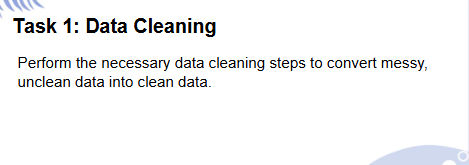

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hotel_dataset=pd.read_csv('Downloads/DS1_C5_S5_Hotel Dataset (1).csv')
hotel_dataset.shape #(2097, 32)
hotel_dataset.info()
# columnsa with missing values
#agent, company

# Replaced Missing values of agent

In [ ]:
hotel_dataset['agent'].isnull().sum()
hotel_dataset['agent'].fillna(hotel_dataset['agent'].median(),inplace=True)


In [ ]:
hotel_dataset['agent'].isnull().sum()

# Replacing Missing values of company

In [ ]:
hotel_dataset['company'].unique()

In [ ]:
hotel_dataset['company'].isnull().sum()# droping it since this column does not look important

In [ ]:
hd=hotel_dataset

In [ ]:
hd=hd.drop('company',axis=1)

In [ ]:
for x in hd.columns:
    if hd[x].isnull().sum()==0:
        print('')
    else:
        print('empty') # so no null value is present

In [ ]:
cat=hd.select_dtypes(include='object')

In [ ]:
num=hd.select_dtypes(exclude='object')

In [ ]:
c=[]
for x in cat.columns:
    c.append(x)
c

In [ ]:
n=[]
for x in num.columns:
    n.append(x)
n

In [ ]:
def check(x):
    if x in c:
        print('Cateogorical Column')
    elif x in n:
        print('Numerical Column')
    

In [ ]:
check('customer_type')

# 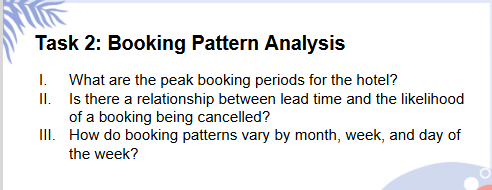

# 1)Peak booking Periods


In [ ]:
hd.groupby('days_in_waiting_list')['days_in_waiting_list'].count()# so as most people got on the ssame day as they booked

In [ ]:
c=hd.groupby('arrival_date_month')['arrival_date_month'].count()
c

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(hd['arrival_date_month'])
plt.show()

# may to august(MAY,JUNE,JULY AND AUGUST )are the peak  booking periods for the hotel

# 2) is there a relationship between lead time and the likelihood of a booking being cancelled


In [ ]:
#'lead_time',previous_cancellations

In [ ]:
check('previous_cancellations')

In [ ]:
hd['lead_time'].corr(hd['previous_cancellations'])

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(x=hd['lead_time'],hue=hd['previous_cancellations'])
plt.show()

# no correlation betwwen lead time and previous_cancellations

# 3)How do Booking patterens vary by month,week,and day of the week?

In [ ]:
hd.info()#lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['reservation_status'],hue=hd['arrival_date_month'])
plt.show()

# most of them who book use the rooms .

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['reservation_status'],hue=hd['arrival_date_week_number'])
plt.show()

# most of them who book use the rooms .

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['reservation_status'],hue=hd['arrival_date_day_of_month'])
plt.show()

# most of them who book use the rooms .

# 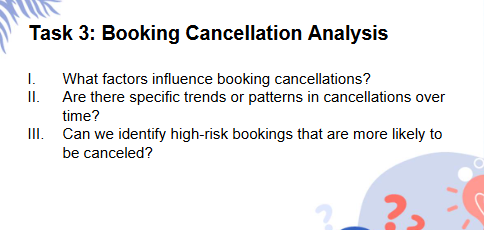

# Task 3: Booking Cancellation Analysis
I.
What factors influence booking cancellations?


In [328]:
import matplotlib.pyplot as plt

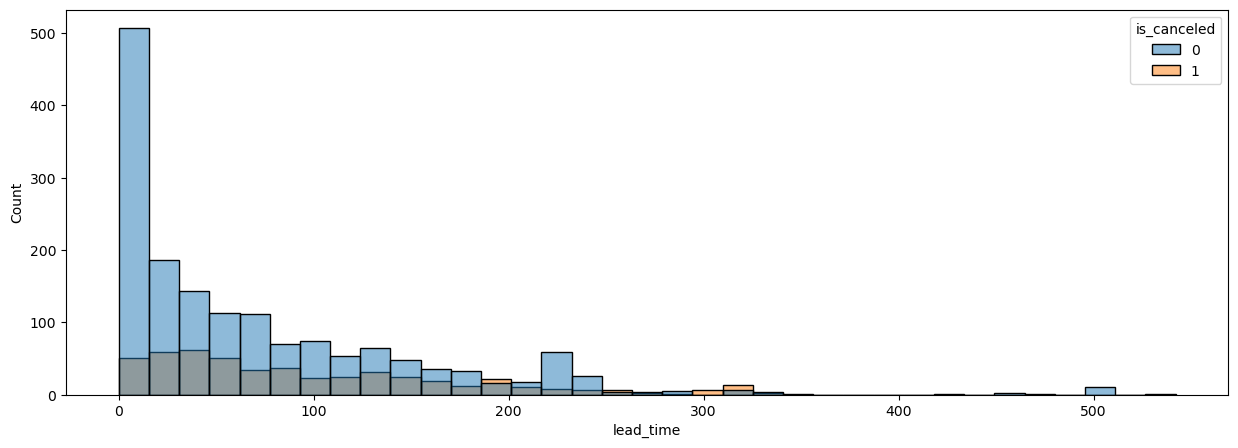

In [338]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['lead_time'],hue=hd['is_canceled'])
plt.show()
    #lead_time,previous_cancellations,booking_changes,

# lead timme did't influence because most customer''s book on that specific day.

# no column influence booking cancellation

# II. Are there specific trends or patterns in cancellations over time?


In [400]:
data =hd['reservation_status_date']
data = pd.to_datetime(data, format="%d-%m-%Y")
year = data.dt.year


In [402]:
hd['year']=year

In [382]:
a='05-07-2015'
a[4]

'7'

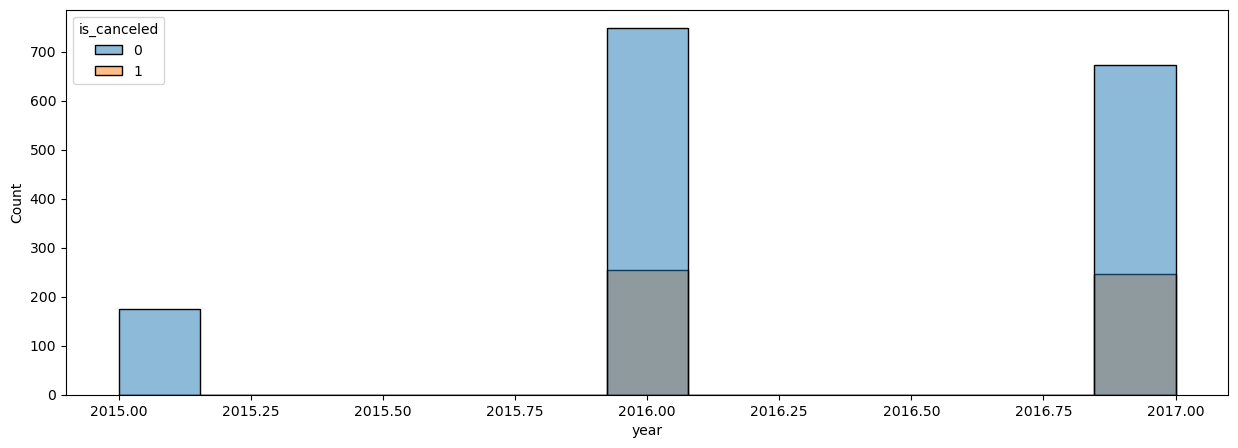

In [404]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['year'],hue=hd['is_canceled'])
plt.show()

# the cancelation have risen from 0 in 2015 to around 300 in  2016  and similar in 2017.

# III. Can we identify high-risk bookings that are more likely to be canceled?
?

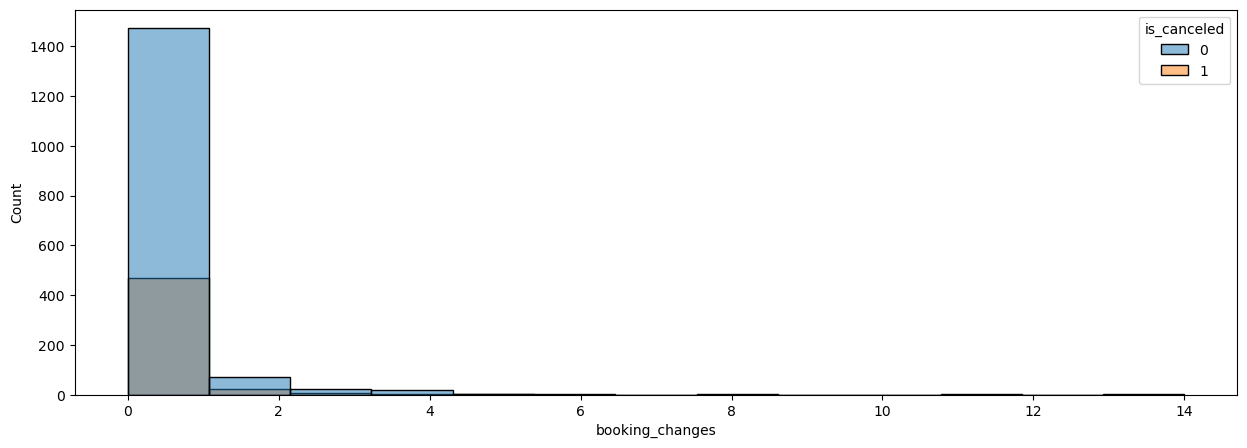

In [343]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['booking_changes'],hue=hd['is_canceled'])
plt.show()

# most have not made changes and  not canceled  

# 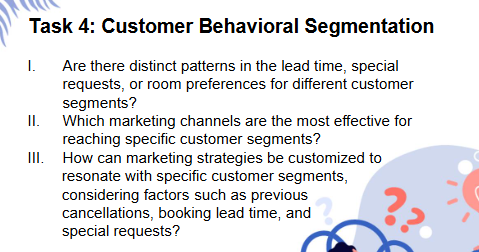

# Task 4: Customer Behavioral Segmentation
I.
Are there distinct patterns in the lead time, special requests, or room preferences for different customer segments?


In [ ]:
#hd.info()#lead_time,total_of_special_requests,reserved_room_type

#  Are there distinct patterns in the lead time,for different customer segments?

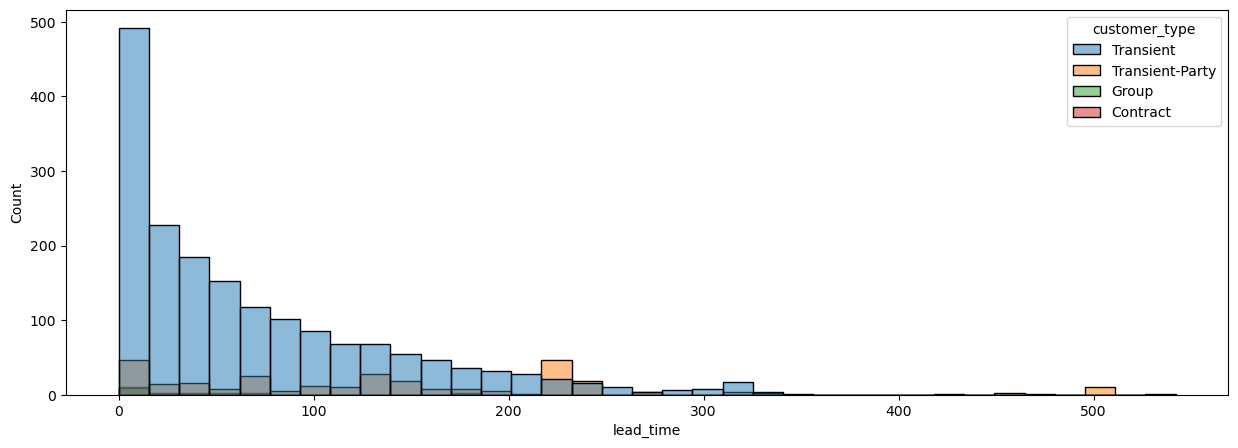

In [270]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['lead_time'],hue=hd['customer_type'])
plt.show()

# most people are transient and they book on the spot

# Are there distinct patterns in the special requests for different customer segments?

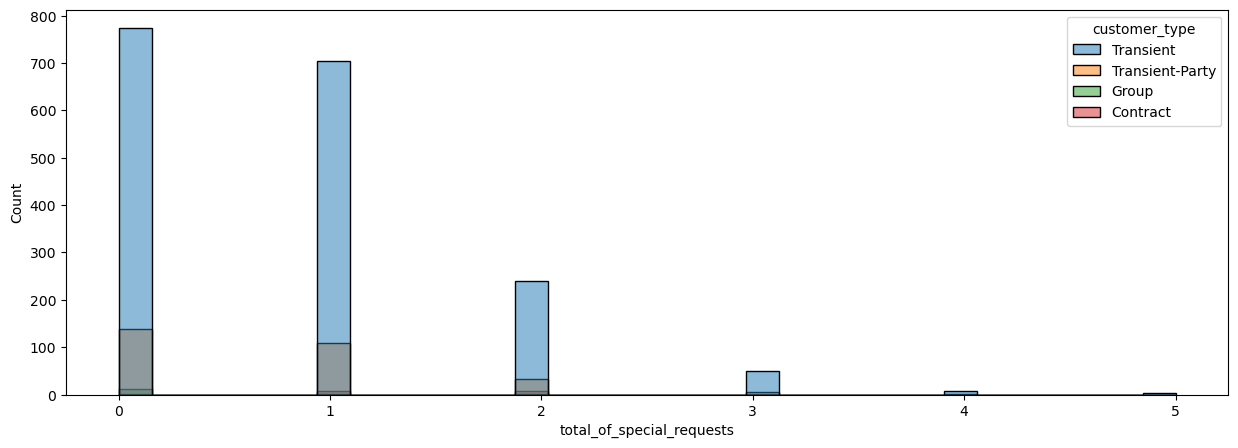

In [273]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['total_of_special_requests'],hue=hd['customer_type'])
plt.show()

# most are of transient type and most did't make any request but there are people who made requests with 5 requests beings the least in it.

# Are there distinct patterns in the room preferences for different customer segments?

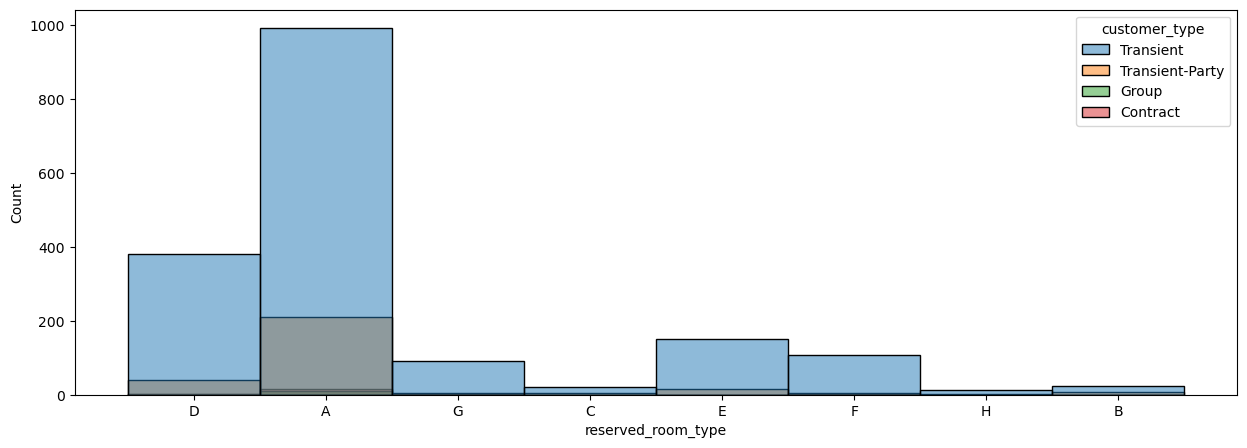

In [279]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['reserved_room_type'],hue=hd['customer_type'])
plt.show()

# most are of transient type and most took A room in it

# II. Which marketing channels are the most effective for reaching specific customer segments?


In [286]:
import matplotlib.pyplot as plt

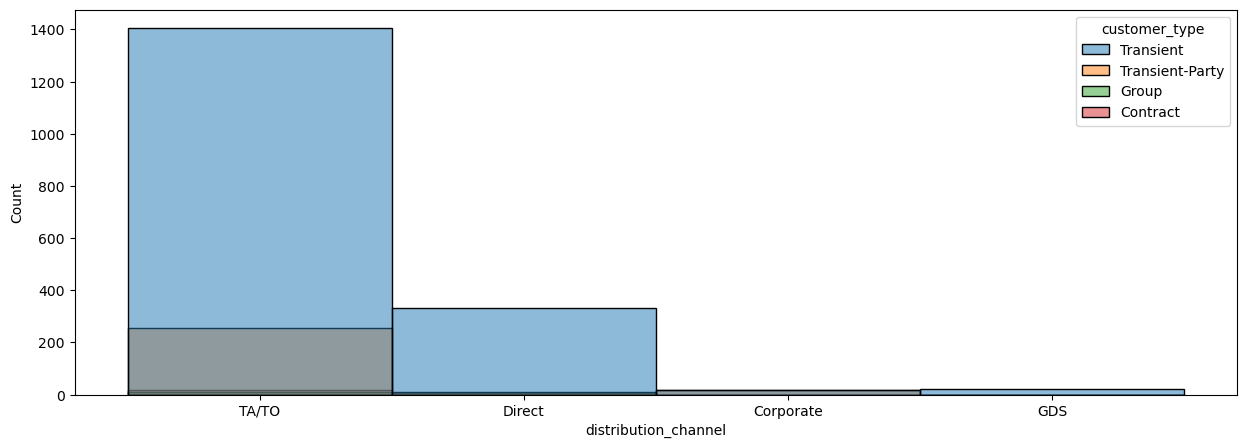

In [288]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['distribution_channel'],hue=hd['customer_type'])
plt.show()

# TA/TO is the most effective for reaching specific customer segments

# III. How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests?

In [ ]:
hd.info()#'distribution_channel','customer_type',   lead_time, previous_cancellations,total_of_special_requests

# we are taking lead time with lesser as longer lead time increases the risk of cancelation

#  assuming more requests mean the chances of them comming is more we taker it greater than or equal to 3

In [320]:
p=hd[(hd['lead_time']<30)|(hd['total_of_special_requests']>=3)]

C:\Users\asher\AppData\Local\Temp\ipykernel_18440\2209311995.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


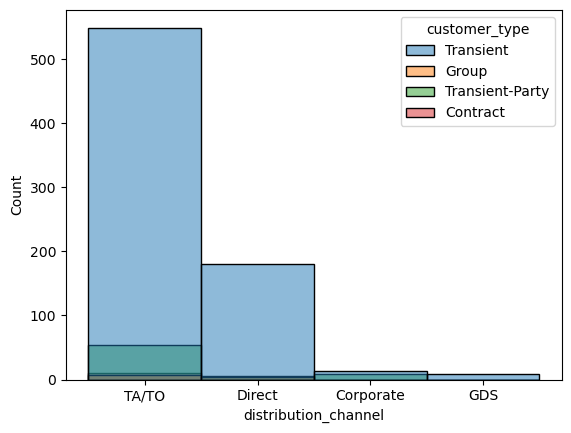

In [322]:
plt,ax=plt.subplots()
sns.histplot(x=p['distribution_channel'],hue=p['customer_type'])
plt.show()

# we have filtered data with lead time 30 indicating that their cancelation chances are lower than the higher lead time and special requests believing if made more special requests he would be dedicated to come we thought converting this customers are easier than other we see still most transient type customer appear  with ta/to being the most marketing channels here to like other times.

# 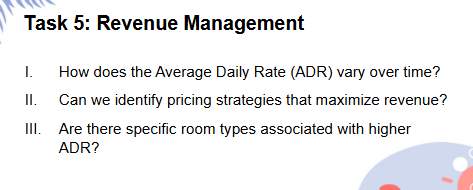

# ADR over Time

In [ ]:
#hd['arrival_date_year']#['adr']
#fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x=hd['adr'],hue=hd['arrival_date_year'])
plt.show()

# as per this ADR   it increases over time

# IDENTIFY PRICING STRATEGIES THAT MAXIMIZE REVENUE

In [ ]:
hd.info()#required_car_parking_spaces,reserved_room_type

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['adr'],hue=hd['reserved_room_type'])
plt.show()

# room type higher type the adr increases

# Are there specific room types with higher adr

In [ ]:
p['adr'].max()

In [ ]:
p=hd[hd['adr']>250]

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(p['reserved_room_type'])
plt.show()

# these are specific roomtype with adr higher than 250 .Room G leads the list with maximum adr.

# 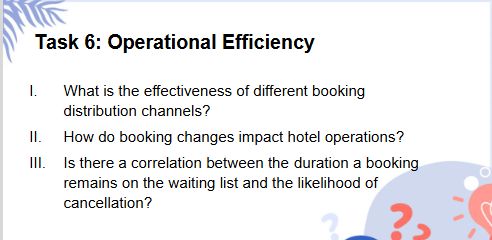

# The Effectiveness of Different Booking Distribution Channel's

C:\Users\asher\AppData\Local\Temp\ipykernel_18440\1114049488.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


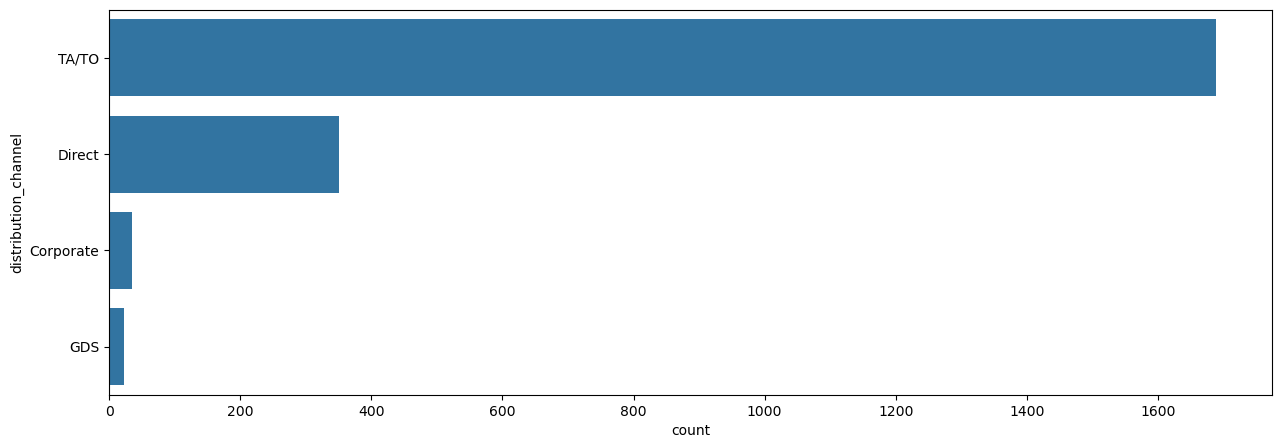

In [282]:
plt,fg=plt.subplots(figsize=(15,5))
sns.countplot(hd['distribution_channel'])
plt.show()

# TA/TO is the leading Booking Distribution Channel .

# 2) Booking changes  impact Hotel operations

In [ ]:
p=hd[hd['is_canceled']==0]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(x=p['distribution_channel'],hue=p['is_canceled'])
plt.show()

# effective customers who book don't cancel also remains same proportion signifying the effectiveness of Hotel Operations.

# 3)

In [ ]:

hd['days_in_waiting_list'].corr(hd['previous_cancellations'])
#p['lead_time'].corr(p['is_canceled'])
#fig,ax=plt.subplots(figsize=(15,5))
#sns.histplot(y=hd['days_in_waiting_list'],x=hd['lead_time'])
#plt.show()

# no correlations between them

# 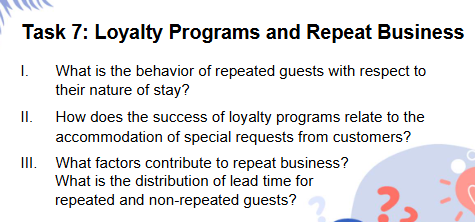

# Task 7: Loyalty Programs and Repeat Business

1)What is the behavior of repeated guests with respect to their nature of stay?


In [213]:
import matplotlib.pyplot as plt

C:\Users\asher\AppData\Local\Temp\ipykernel_18440\11877124.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


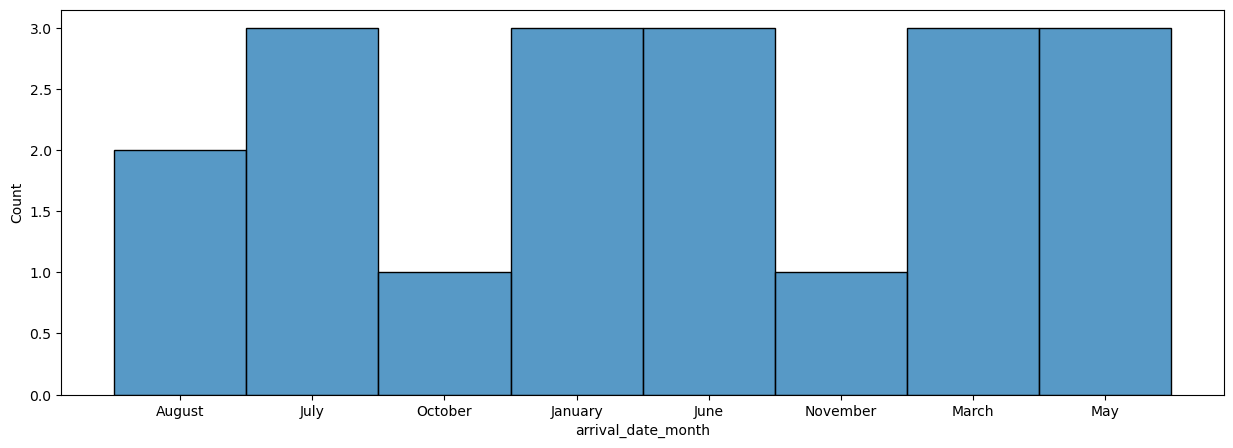

In [215]:
#hd.info()# is_repeated_guest
rep=hd[hd['is_repeated_guest']==1]
plt,ax=plt.subplots(figsize=(15,5))
sns.histplot(rep['arrival_date_month'])
plt.show()

# They  come and stay frequently especially during January,March,May,June,July

# 2)How does the success of loyalty programs relate to the accommodation of special requests from customers?


In [ ]:
#p.info()#total_of_special_requests


In [219]:
import matplotlib.pyplot as plt

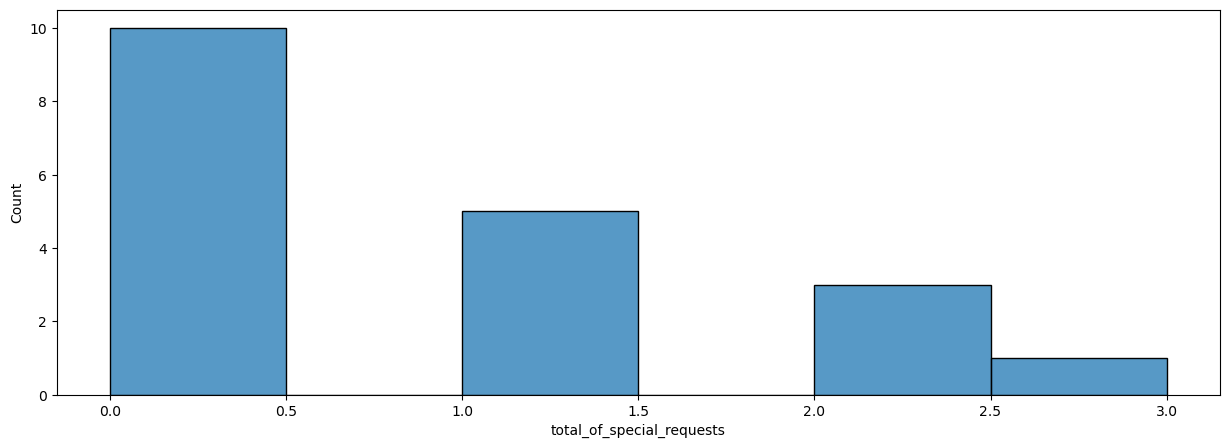

In [228]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(rep['total_of_special_requests'])
plt.show()

# mostly it does't relate to the accommodation of special requests from customers but in few cases it does as they have made 1,2,3 requests but most have made zero requests in the loyal customers.

# 3) What factors contribute to repeat business?
What is the distribution of lead time for
repeated and non-repeated guests?
?

In [ ]:
rep.info()# lead_time

# distribution of lead time for repeated

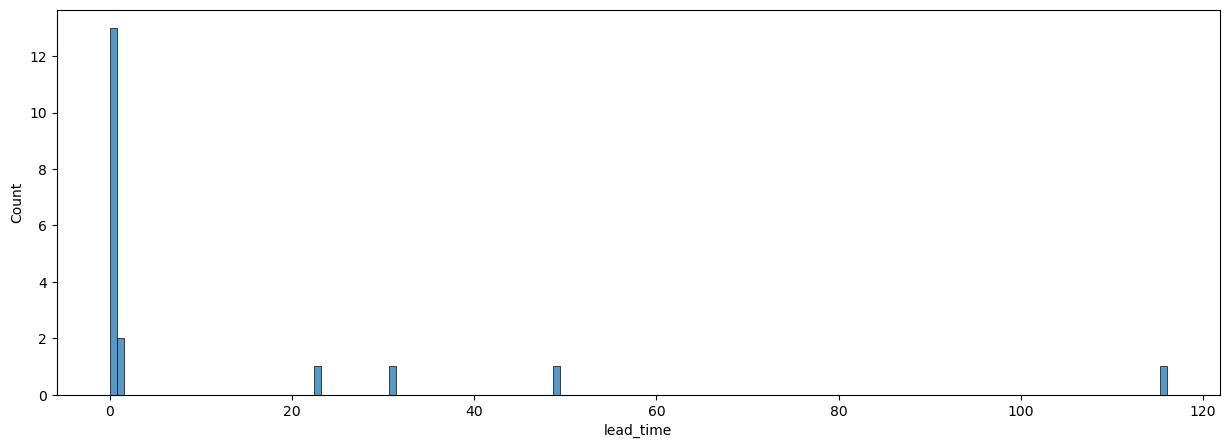

In [233]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(rep['lead_time'])
plt.show()

# so most repeated customer's book  on the spot

# distribution of lead time for non-repeated guests

In [237]:
nonrep=hd[hd['is_repeated_guest']==0]
nonrep

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,0,No Deposit,242.0,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,0,No Deposit,240.0,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,0,No Deposit,241.0,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,0,No Deposit,241.0,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,0,No Deposit,14.0,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,4,No Deposit,14.0,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,1,No Deposit,42.0,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,0,No Deposit,14.0,0,Transient,117.00,0,1,Check-Out,03-09-2017


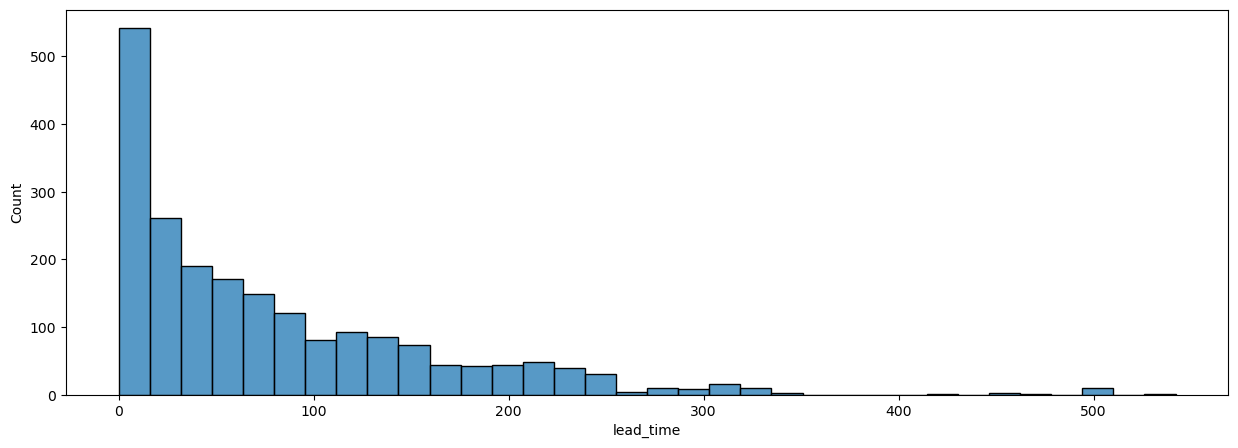

In [239]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(nonrep['lead_time'])
plt.show()

# in them also most book on around 550 book on the day of arrival